In [1]:
'''Code for fine-tuning Inception V3 for a new task.

Start with Inception V3 network, not including last fully connected layers.

Train a simple fully connected layer on top of these.


'''

import numpy as np
import pandas as pd
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout
import keras.applications.inception_v3 as inception
import cnn_c as OurNetwork
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
IMSIZE = (196, 196)

PHOTO_PATH = r"\\devmachine\e$\data\katkam-secret-location\katkam-scaled"



Using TensorFlow backend.


In [2]:
cleaned_data = pd.read_csv("cleaned_data.csv")
weather_array = list(map(lambda x:x.split(',') ,cleaned_data["Mapped"].values))
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(weather_array)
cleaned_data["Y"] = list(Y)

cleaned_data
# print(mlb.classes_)

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y
0,2016-06-05 07:00:00,2016,6,5,07:00,katkam-20160605070000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
1,2016-06-05 10:00:00,2016,6,5,10:00,katkam-20160605100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
2,2016-06-05 13:00:00,2016,6,5,13:00,katkam-20160605130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
3,2016-06-05 16:00:00,2016,6,5,16:00,katkam-20160605160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
4,2016-06-05 19:00:00,2016,6,5,19:00,katkam-20160605190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
5,2016-06-06 07:00:00,2016,6,6,07:00,katkam-20160606070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
6,2016-06-06 10:00:00,2016,6,6,10:00,katkam-20160606100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
7,2016-06-06 13:00:00,2016,6,6,13:00,katkam-20160606130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
8,2016-06-06 16:00:00,2016,6,6,16:00,katkam-20160606160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
9,2016-06-06 19:00:00,2016,6,6,19:00,katkam-20160606190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"


In [3]:
#
clear_days_mask = cleaned_data.apply(lambda x: x["Y"][0]==1,axis = 1)
clear_days = cleaned_data[clear_days_mask]
non_clear_days = cleaned_data[~clear_days_mask].sample(len(clear_days))
final_data = clear_days.append( non_clear_days)
final_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
final_data = final_data.sample(frac=1)

In [4]:
train_test_mask = np.random.rand(len(final_data)) < 0.8
train_data = final_data[train_test_mask]
test_data = final_data[~train_test_mask]
# test_data

In [5]:
# base_model = inception.InceptionV3(weights='imagenet')
# # Turn off training on base model layers
# for layer in base_model.layers:
#     layer.trainable = False
# # k=base_model.get_layer('flatten').output
# # Add on new fully connected layers for the output classes.
# x = Dense(1024, activation='relu')(base_model.get_layer('avg_pool').output)
# x = Dropout(0.5)(x)
# predictions = Dense(2, activation='softmax', name='predictions')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# Start with an Inception V3 model, not including the final softmax layer.
model = OurNetwork.network(classes = 2)

# All parameter gradients will be clipped to
# a maximum value of 0.5 and
# a minimum value of -0.5.
optimizer = optimizers.SGD(lr=0.005, momentum=0.1, decay=0.0, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# print ('Loaded Inception model')

# print(model.summary())

In [7]:

#print(val_files)
# np.random.seed(0)
img_datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

def my_load_img(img_path,img_datagen,size):
    img = image.load_img(img_path, target_size=size)
    x = image.img_to_array(img)
    x = img_datagen.random_transform(x)
    x = img_datagen.standardize(x)
    return x
def my_img_generator(df,img_datagen,batch_size):
#     index_array = np.random.permutation(len(files))
    
    index = 0
    count = 0
    img_datas=[]
    img_labels=[]
    while 1:
        # create numpy arrays of input data
        # and labels, from each line in the file
        item = df.iloc[index]
        if count < batch_size:
            img_datas.append(my_load_img(PHOTO_PATH+"/"+item["Filename"],img_datagen,IMSIZE))
            img_labels.append(item["Y2"])
            index=(index+1)%df.shape[0]
            count+=1
        else:
            count=0
            yield (np.array(img_datas),np.array(img_labels))
                # yield (np.array(img_datas),np.array(img_bboxes))
#             else:
#                 yield (np.array(img_datas),np.array(one_hot_labels))
            img_datas = []
            img_labels = []
            img_bboxes=[]
#             random.shuffle(files)
            

batch_size=64
# t = next(my_img_generator(train_files,img_datagen,batch_size))

# model.load_weights('catdog_pretrain_nf.h5') 
# train_data
# train_data.shape
my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
my_test_generator = my_img_generator(test_data,img_datagen,batch_size)

# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         r'E:\workshare\Mind\A3\data\catdog',  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')

#test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#         test_dir,  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')
# train_data.shape
# print(next(train_generator)[1])
# print(next(my_train_generator)[1])

# print(a[1].shape)
# print(a[1])

In [8]:

model.load_weights('cnn_c-1.h5',by_name=True)
# model.save_weights('cnn_c.h5') 

for i in range(10):
    '''Refresh data'''
#     final_data = final_data.sample(frac=1)
#     final_data.sample()
#     train_test_mask = np.random.rand(len(final_data)) < 0.8
#     train_data = final_data[train_test_mask]
#     test_data = final_data[~train_test_mask]
#     my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
#     my_test_generator = my_img_generator(test_data,img_datagen,batch_size)
    
    model.fit_generator(
            my_train_generator,
            steps_per_epoch = 5,
            epochs = 10,
            validation_data = my_test_generator,
            verbose = 2,
            validation_steps = 5)
    model.save_weights('cnn_c-1.h5') 


Epoch 1/10
10s - loss: 0.2159 - acc: 0.9297 - val_loss: 0.2132 - val_acc: 0.9156
Epoch 2/10
5s - loss: 0.3735 - acc: 0.8609 - val_loss: 0.2311 - val_acc: 0.8844
Epoch 3/10
5s - loss: 0.2960 - acc: 0.9062 - val_loss: 0.2347 - val_acc: 0.9141
Epoch 4/10
5s - loss: 0.2557 - acc: 0.9172 - val_loss: 0.1973 - val_acc: 0.9281
Epoch 5/10
5s - loss: 0.1790 - acc: 0.9219 - val_loss: 0.1818 - val_acc: 0.9437
Epoch 6/10
5s - loss: 0.2104 - acc: 0.9375 - val_loss: 0.1769 - val_acc: 0.9469
Epoch 7/10
5s - loss: 0.1995 - acc: 0.9047 - val_loss: 0.2333 - val_acc: 0.9406
Epoch 8/10
5s - loss: 0.2063 - acc: 0.9156 - val_loss: 0.2487 - val_acc: 0.9219
Epoch 9/10
5s - loss: 0.2363 - acc: 0.8937 - val_loss: 0.2492 - val_acc: 0.9391
Epoch 10/10
5s - loss: 0.1942 - acc: 0.9234 - val_loss: 0.2061 - val_acc: 0.9359
Epoch 1/10
7s - loss: 0.2261 - acc: 0.9125 - val_loss: 0.2905 - val_acc: 0.9016
Epoch 2/10
5s - loss: 0.2270 - acc: 0.9141 - val_loss: 0.2387 - val_acc: 0.9437
Epoch 3/10
5s - loss: 0.2257 - acc: 0.

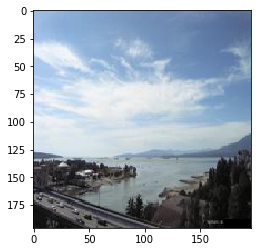

Predicted: [[ 0.98448062  0.01419265]]


In [10]:
img_path = PHOTO_PATH+"/"+"katkam-20160606160000.jpg"
model.load_weights('cnn_c-1.h5') 

img = image.load_img(img_path , target_size=IMSIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# x = inception.preprocess_input(x)
# x = image.img_to_array(img)
# x = img_datagen.random_transform(x)
x = img_datagen.standardize(x)
preds = model.predict(x)
plt.imshow(img)
plt.show()
print('Predicted:', preds)
# [Clear, Cloudy, Fog, Rain, Snow]

In [ ]:
pics = cleaned_data.loc[cleaned_data["Mapped"].str.contains("Fog")]
# fig = plt.figure()
# fig.add_subplot(221)
# img = image.load_img(img_path , target_size=IMSIZE)
# plt.imshow(img)

# fig.add_subplot(222)


# img2 = image.load_img(PHOTO_PATH+"/"+ "katkam-20160829060000.jpg", target_size=IMSIZE)

# plt.imshow(img2)
# fig.add_subplot(223)
# plt.imshow(img2)

# plt.show()
def listPhotots(photos):
    for p in photos:
        plt.figure(figsize=(8,8))
        img = image.load_img(PHOTO_PATH+"/"+ p, target_size=IMSIZE)
        plt.imshow(img)
        plt.show()
        print(p)
# listPhotots(cleaned_data[cleaned_data["Mapped"].str.contains("Snow")]["Filename"].values)
20160709060000
# listPhotots(["katkam-20160709060000.jpg"])
# listPhotots(cleaned_data[(cleaned_data["Month"] ==11)
#                         ]["Filename"].values)
cleaned_data[(cleaned_data["Mapped"].str.contains("Snow"))]

In [11]:
cleaned_data

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y
0,2016-06-05 07:00:00,2016,6,5,07:00,katkam-20160605070000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
1,2016-06-05 10:00:00,2016,6,5,10:00,katkam-20160605100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
2,2016-06-05 13:00:00,2016,6,5,13:00,katkam-20160605130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
3,2016-06-05 16:00:00,2016,6,5,16:00,katkam-20160605160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
4,2016-06-05 19:00:00,2016,6,5,19:00,katkam-20160605190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
5,2016-06-06 07:00:00,2016,6,6,07:00,katkam-20160606070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
6,2016-06-06 10:00:00,2016,6,6,10:00,katkam-20160606100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
7,2016-06-06 13:00:00,2016,6,6,13:00,katkam-20160606130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
8,2016-06-06 16:00:00,2016,6,6,16:00,katkam-20160606160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
9,2016-06-06 19:00:00,2016,6,6,19:00,katkam-20160606190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"


In [16]:
def batchPredict(imageNames):
    result = []
    for filename in imageNames:
        img_path = PHOTO_PATH+"/"+filename
        img = image.load_img(img_path , target_size=IMSIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = img_datagen.standardize(x)
        preds = model.predict(x)
        result.append(preds[0])
    return result

cleaned_data["Predict_Y2"] = batchPredict(cleaned_data["Filename"].values)
cleaned_data

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y,Predict_Y2
0,2016-06-05 07:00:00,2016,6,5,07:00,katkam-20160605070000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[0.998391, 0.00160885]"
1,2016-06-05 10:00:00,2016,6,5,10:00,katkam-20160605100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.107082, 0.889138]"
2,2016-06-05 13:00:00,2016,6,5,13:00,katkam-20160605130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.582846, 0.418604]"
3,2016-06-05 16:00:00,2016,6,5,16:00,katkam-20160605160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.924959, 0.0701886]"
4,2016-06-05 19:00:00,2016,6,5,19:00,katkam-20160605190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.760406, 0.229199]"
5,2016-06-06 07:00:00,2016,6,6,07:00,katkam-20160606070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.854044, 0.149221]"
6,2016-06-06 10:00:00,2016,6,6,10:00,katkam-20160606100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.782355, 0.203388]"
7,2016-06-06 13:00:00,2016,6,6,13:00,katkam-20160606130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.48473, 0.515252]"
8,2016-06-06 16:00:00,2016,6,6,16:00,katkam-20160606160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[0.984481, 0.0141926]"
9,2016-06-06 19:00:00,2016,6,6,19:00,katkam-20160606190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.541879, 0.454545]"
